In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
card = '../../data/가공데이터/카드매출.csv'
gs = '../../data/가공데이터/유통데이터.csv'
flow_time = '../../data/가공데이터/유동인구_시간.csv'
flow_sexage = '../../data/가공데이터/유동인구_성연령.csv'
data_mi = '../../data/가공데이터/환경기상데이터.csv'

In [5]:
df_card = pd.read_csv(card)
df_gs = pd.read_csv(gs)
df_flow_t = pd.read_csv(flow_time)
df_flow_sa = pd.read_csv(flow_sexage)
df_mi = pd.read_csv(data_mi, encoding = 'euc-kr')

In [6]:
df_card['나이코드'] = df_card['나이코드'].astype(str)
df_card.info()
df_card.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152963 entries, 0 to 2152962
Data columns (total 8 columns):
날짜      object
업종코드    int64
성별코드    object
나이코드    object
이용건수    int64
이용금액    int64
구       object
동       object
dtypes: int64(3), object(5)
memory usage: 131.4+ MB


,날짜,업종코드,성별코드,나이코드,이용건수,이용금액,구,동
0,2018-04-01,21,F,30,4,180,종로구,청운효자동
1,2018-04-01,21,F,55,4,22,종로구,청운효자동
2,2018-04-01,21,M,20,35,184,종로구,청운효자동
3,2018-04-01,21,M,25,70,425,종로구,청운효자동
4,2018-04-01,21,M,30,18,82,종로구,청운효자동


In [7]:
df_gs.info()
df_gs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
날짜            13125 non-null object
매출지수          13125 non-null float64
식사_비중         13125 non-null float64
간식_비중         13125 non-null float64
마실거리_비중       13125 non-null float64
홈&리빙_비중       13093 non-null float64
헬스&뷰티_비중      13123 non-null float64
취미&여가활동_비중    12075 non-null float64
사회활동_비중       12886 non-null float64
임신/육아_비중      12543 non-null float64
구             13125 non-null object
동             13125 non-null object
dtypes: float64(9), object(3)
memory usage: 1.2+ MB


,날짜,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,구,동
0,2018-04-01,0.736933,0.279018,0.299569,0.334816,0.015636,0.053782,0.000265,0.013092,0.003823,종로구,청운효자동
1,2018-04-02,0.864278,0.269639,0.246128,0.405010,0.037167,0.030789,0.001088,0.002977,0.007202,종로구,청운효자동
2,2018-04-03,0.722251,0.317966,0.246601,0.360837,0.012022,0.049623,0.005095,0.005497,0.002359,종로구,청운효자동
3,2018-04-04,0.717211,0.339813,0.222234,0.354690,0.031807,0.038534,0.002186,0.006092,0.004643,종로구,청운효자동
4,2018-04-05,0.606730,0.381157,0.242949,0.287096,0.021554,0.051529,0.006083,0.008590,0.001042,종로구,청운효자동


In [8]:
df_flow_t.info()
df_flow_t.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13140 entries, 0 to 13139
Data columns (total 27 columns):
날짜          13140 non-null object
HDONG_CD    13140 non-null int64
동           13140 non-null object
TMST_00     13140 non-null float64
TMST_01     13140 non-null float64
TMST_02     13140 non-null float64
TMST_03     13140 non-null float64
TMST_04     13140 non-null float64
TMST_05     13140 non-null float64
TMST_06     13140 non-null float64
TMST_07     13140 non-null float64
TMST_08     13140 non-null float64
TMST_09     13140 non-null float64
TMST_10     13140 non-null float64
TMST_11     13140 non-null float64
TMST_12     13140 non-null float64
TMST_13     13140 non-null float64
TMST_14     13140 non-null float64
TMST_15     13140 non-null float64
TMST_16     13140 non-null float64
TMST_17     13140 non-null float64
TMST_18     13140 non-null float64
TMST_19     13140 non-null float64
TMST_20     13140 non-null float64
TMST_21     13140 non-null float64
TMST_22     13140 no

,날짜,HDONG_CD,동,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,2018-04-01,1111051500,청운효자동,609.11,447.82,301.75,217.03,237.07,318.75,519.28,...,3097.34,2550.96,2464.35,2327.44,1933.71,1597.47,1331.83,1231.07,1041.82,624.62
1,2018-04-01,1111053000,사직동,1904.32,1319.04,951.80,779.08,779.14,1355.75,2473.61,...,10166.17,9179.66,8899.18,8318.59,7009.69,5750.79,5137.36,4532.06,3589.93,2308.88
2,2018-04-01,1111054000,삼청동,216.30,158.05,91.13,85.30,86.76,146.87,287.34,...,2361.17,2126.52,1998.35,1794.76,1281.02,1059.50,875.79,691.84,433.89,229.83
3,2018-04-01,1111055000,부암동,1300.61,904.38,670.74,433.02,571.34,771.25,1031.59,...,5155.72,4888.78,5111.07,5067.47,4148.24,3502.62,3217.30,2925.42,2374.94,1382.12
4,2018-04-01,1111056000,평창동,2523.88,2168.69,1672.82,1300.87,1400.14,1686.09,2277.03,...,10460.65,9539.91,8973.38,7940.15,6992.54,6460.50,5661.25,5210.50,4416.75,3060.66


In [9]:
df_flow_sa.info()
df_flow_sa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13140 entries, 0 to 13139
Data columns (total 33 columns):
날짜                        13140 non-null object
HDONG_CD                  13140 non-null int64
동                         13140 non-null object
MAN_FLOW_POP_CNT_0004     13140 non-null float64
MAN_FLOW_POP_CNT_0509     13140 non-null float64
MAN_FLOW_POP_CNT_1014     13140 non-null float64
MAN_FLOW_POP_CNT_1519     13140 non-null float64
MAN_FLOW_POP_CNT_2024     13140 non-null float64
MAN_FLOW_POP_CNT_2529     13140 non-null float64
MAN_FLOW_POP_CNT_3034     13140 non-null float64
MAN_FLOW_POP_CNT_3539     13140 non-null float64
MAN_FLOW_POP_CNT_4044     13140 non-null float64
MAN_FLOW_POP_CNT_4549     13140 non-null float64
MAN_FLOW_POP_CNT_5054     13140 non-null float64
MAN_FLOW_POP_CNT_5559     13140 non-null float64
MAN_FLOW_POP_CNT_6064     13140 non-null float64
MAN_FLOW_POP_CNT_6569     13140 non-null float64
MAN_FLOW_POP_CNT_70U      13140 non-null float64
WMAN_FLOW_POP

,날짜,HDONG_CD,동,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,2018-04-01,1111051500,청운효자동,0.05,78.93,403.26,642.66,984.24,1792.30,1936.10,...,1437.80,1356.08,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,549.45,811.56
1,2018-04-01,1111053000,사직동,1.25,262.54,1207.22,2177.88,4076.89,6887.72,6786.94,...,6892.47,5743.10,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,2160.84,2972.08
2,2018-04-01,1111054000,삼청동,0.00,78.07,255.24,331.09,654.32,1264.86,1375.14,...,1400.28,1183.11,1234.88,1157.69,1186.72,985.11,844.26,744.60,359.03,421.64
3,2018-04-01,1111055000,부암동,0.00,228.50,753.31,981.54,1615.77,2732.00,3390.58,...,2153.73,2431.23,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,1118.48,1498.65
4,2018-04-01,1111056000,평창동,0.00,354.38,1500.63,1963.08,2593.07,4927.24,5718.38,...,3775.91,4598.39,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,2629.75,3820.41


In [9]:
df_mi.info()
df_mi = df_mi.rename(columns = {'행정동' : '동'})
df_mi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16105 entries, 0 to 16104
Data columns (total 11 columns):
날짜       16105 non-null int64
구        16105 non-null object
동        16105 non-null object
예보       16105 non-null object
pm10     15606 non-null float64
co2      0 non-null float64
vocs     0 non-null float64
noise    15795 non-null float64
temp     14436 non-null float64
humi     15780 non-null float64
pm25     15474 non-null float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.4+ MB


,날짜,구,동,예보,pm10,co2,vocs,noise,temp,humi,pm25
0,20180401,종로구,사직동,좋음,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20180402,종로구,사직동,좋음,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20180403,종로구,사직동,좋음,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20180404,종로구,사직동,좋음,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20180405,종로구,사직동,좋음,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 유동인구 데이터 변환(카드 데이터와 합치기 위해)

In [10]:
#0~25살, 65세 이상 데이터 하나로 합침

df_flow_sa['MAN_FLOW_POP_CNT_0024'] = df_flow_sa['MAN_FLOW_POP_CNT_0004'] + df_flow_sa['MAN_FLOW_POP_CNT_0509'] + df_flow_sa['MAN_FLOW_POP_CNT_1014'] + df_flow_sa['MAN_FLOW_POP_CNT_1519'] + df_flow_sa['MAN_FLOW_POP_CNT_2024']
df_flow_sa['WMAN_FLOW_POP_CNT_0024'] = df_flow_sa['WMAN_FLOW_POP_CNT_0004'] + df_flow_sa['WMAN_FLOW_POP_CNT_0509'] + df_flow_sa['WMAN_FLOW_POP_CNT_1014'] + df_flow_sa['WMAN_FLOW_POP_CNT_1519'] + df_flow_sa['WMAN_FLOW_POP_CNT_2024']
df_flow_sa['MAN_FLOW_POP_CNT_65U'] = df_flow_sa['MAN_FLOW_POP_CNT_6569'] + df_flow_sa['MAN_FLOW_POP_CNT_70U']
df_flow_sa['WMAN_FLOW_POP_CNT_65U'] = df_flow_sa['WMAN_FLOW_POP_CNT_6569'] + df_flow_sa['WMAN_FLOW_POP_CNT_70U']

df_flow_sa = df_flow_sa.drop(columns = ['MAN_FLOW_POP_CNT_0004', 'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014', 'MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024','MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U', 'WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509', 'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519', 'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_6569', 'WMAN_FLOW_POP_CNT_70U'])
df_flow_sa.head()
                                        

,날짜,HDONG_CD,동,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,...,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_0024,WMAN_FLOW_POP_CNT_0024,MAN_FLOW_POP_CNT_65U,WMAN_FLOW_POP_CNT_65U
0,2018-04-01,1111051500,청운효자동,1792.30,1936.10,2060.54,1787.98,2369.93,2348.95,2123.78,...,1598.14,1495.53,1768.21,1611.47,1433.06,1212.56,2109.14,2340.12,2435.05,1361.01
1,2018-04-01,1111053000,사직동,6887.72,6786.94,6873.70,5920.97,7406.48,6956.00,7294.07,...,5817.91,5429.89,6104.03,4998.93,4826.11,4207.45,7725.78,9856.97,9195.43,5132.92
2,2018-04-01,1111054000,삼청동,1264.86,1375.14,1445.40,1237.07,1658.35,1402.99,1360.18,...,1234.88,1157.69,1186.72,985.11,844.26,744.60,1318.72,1799.82,1689.96,780.67
3,2018-04-01,1111055000,부암동,2732.00,3390.58,4288.35,3857.72,4912.69,4756.22,4692.38,...,3028.24,2944.28,3532.23,3075.55,2785.22,2223.72,3579.12,4038.98,4816.50,2617.13
4,2018-04-01,1111056000,평창동,4927.24,5718.38,6997.92,6618.99,9064.13,9493.46,9873.77,...,5661.53,5526.94,7075.02,6899.55,6886.22,5336.01,6411.16,7639.22,10665.90,6450.16


In [11]:
columns_flow = df_flow_sa.columns.tolist()
columns_man = [d for d in columns_flow if 'MAN' in d and 'WMAN' not in d]
columns_woman = [d for d in columns_flow if 'WMAN' in d]
columns_default = ['날짜', '동']

df_flow_man = df_flow_sa[columns_default + columns_man]
df_flow_woman = df_flow_sa[columns_default + columns_woman]

df_flow_man.insert(2, '성별코드', 'M')
df_flow_woman.insert(2, '성별코드', 'F')

columns_man_new = [d[4:] for d in df_flow_man.columns.tolist() if 'MAN' in d]
columns_woman_new = [d[5:] for d in df_flow_woman.columns.tolist() if 'WMAN' in d]
columns_default = ['날짜', '동', '성별코드']

df_flow_man.columns = columns_default + columns_man_new
df_flow_woman.columns = columns_default + columns_woman_new

df_flow_sex = pd.concat([df_flow_man,df_flow_woman], sort = False)

In [12]:
columns_flow_age = df_flow_sex.columns.tolist()
df_flow_age = []

for i in range(10):
    
    columns_age = columns_flow_age[3:]
    df_flow_age.append(df_flow_sex[columns_default + [columns_age[i]]])
    df_flow_age[i].insert(3, '나이코드', columns_age[i][-4:-2])
    df_flow_age[i] = df_flow_age[i].rename(columns = {df_flow_age[i].columns.tolist()[-1] : df_flow_age[i].columns.tolist()[-1][0:12]})
    
df_flow_final = pd.concat(df_flow_age, sort = False)



df_flow_final['나이코드'] = df_flow_final['나이코드'].replace('_6', '65')
df_flow_final['나이코드'] = df_flow_final['나이코드'].replace('00', '20')

df_flow_final.info()
df_flow_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262800 entries, 0 to 13139
Data columns (total 5 columns):
날짜              262800 non-null object
동               262800 non-null object
성별코드            262800 non-null object
나이코드            262800 non-null object
FLOW_POP_CNT    262800 non-null float64
dtypes: float64(1), object(4)
memory usage: 12.0+ MB


,날짜,동,성별코드,나이코드,FLOW_POP_CNT
0,2018-04-01,청운효자동,M,25,1792.30
1,2018-04-01,사직동,M,25,6887.72
2,2018-04-01,삼청동,M,25,1264.86
3,2018-04-01,부암동,M,25,2732.00
4,2018-04-01,평창동,M,25,4927.24


In [13]:
df_card_flow = pd.merge(df_card, df_flow_final ,on = ['날짜', '동', '성별코드', '나이코드'])

df_card_flow.info()
df_card_flow.head(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152963 entries, 0 to 2152962
Data columns (total 9 columns):
날짜              object
업종코드            int64
성별코드            object
나이코드            object
이용건수            int64
이용금액            int64
구               object
동               object
FLOW_POP_CNT    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 164.3+ MB


,날짜,업종코드,성별코드,나이코드,이용건수,이용금액,구,동,FLOW_POP_CNT
0,2018-04-01,21,F,30,4,180,종로구,청운효자동,1356.08
1,2018-04-01,40,F,30,140,1405,종로구,청운효자동,1356.08
2,2018-04-01,44,F,30,4,705,종로구,청운효자동,1356.08
3,2018-04-01,62,F,30,70,198,종로구,청운효자동,1356.08
4,2018-04-01,70,F,30,9,35,종로구,청운효자동,1356.08
5,2018-04-01,71,F,30,4,31,종로구,청운효자동,1356.08
6,2018-04-01,80,F,30,280,3873,종로구,청운효자동,1356.08
7,2018-04-01,81,F,30,110,1316,종로구,청운효자동,1356.08
8,2018-04-01,21,F,55,4,22,종로구,청운효자동,1433.06
9,2018-04-01,40,F,55,127,1776,종로구,청운효자동,1433.06


## Dataframe 합치기

결제 데이터 : 일 - 구 - 행정동 + 성별코드 + 나이코드

나머지 데이터 : 일 - 구 - 행정동

In [14]:
df_mi['날짜'] = df_mi['날짜'].astype(str)

df_mi['날짜'].head()


0    20180401
1    20180402
2    20180403
3    20180404
4    20180405
Name: 날짜, dtype: object

In [1]:
for df in [df_card, df_gs, df_flow_t, df_flow_sa, df_mi, df_card_flow]:
    df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

NameError: name 'df_card' is not defined

In [2]:
a = pd.merge(df_mi, df_gs ,on = ['날짜', '구', '동'])
a = pd.merge(a, df_card_flow, on = ['날짜','구', '동'])
a.head(10000)

NameError: name 'pd' is not defined

In [17]:
a.to_csv('df_final.csv')

371067


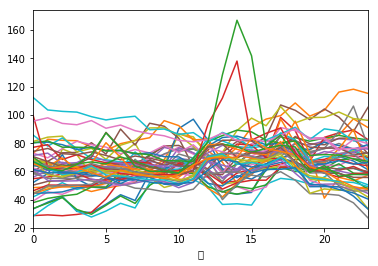

In [20]:
data_mi2 = df_mi.dropna(subset = ['pm10'])
print(len(df_mi) - np.sum(df_mi.pm10.isnull()))

data_mi_pivot = data_mi2.pivot_table('pm10', index = ['날짜', '구', '행정동'], columns = ['시'])


for i in range(53):
    data_mi_pivot.iloc[i].plot()

# 요일별 이용금액 파악

          날짜       업종코드       나이코드        이용건수         이용금액  week
0 2018-04-01  53.883367  41.340546  106.006969  2238.697598     6
1 2018-04-02  56.146016  42.031707  111.213984  2252.666667     0
2 2018-04-03  56.142666  41.824629  114.199900  2322.387786     1
3 2018-04-04  56.308620  42.023613  115.525429  2373.165291     2
4 2018-04-05  56.018347  41.767430  108.409575  2213.524725     3


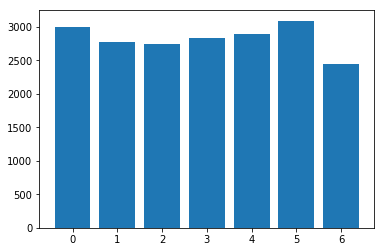

           날짜       업종코드       나이코드        이용건수         이용금액  week
33 2018-05-04  54.975764  41.718676  119.253287  2626.841280     4
34 2018-05-05  53.532153  41.622786  115.404181  2711.960268     5
35 2018-05-06  53.365503  41.242300  105.501960  2410.502520     6
36 2018-05-07  54.290866  41.503574  103.156632  2296.162986     0
37 2018-05-08  55.065649  41.799433  109.688287  2280.679943     1


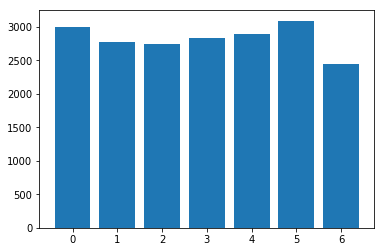

           날짜       업종코드       나이코드        이용건수         이용금액  week
66 2018-06-06  54.165259  41.712572  111.069280  2276.406725     2
67 2018-06-07  55.665961  41.952094  112.681115  2172.997882     3
68 2018-06-08  55.258825  41.889540  117.921425  2413.778591     4
69 2018-06-09  55.155640  41.509137  113.907530  2550.298519     5
70 2018-06-10  53.752543  41.426854  103.649343  1951.964490     6


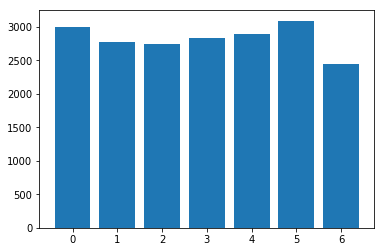

            날짜       업종코드       나이코드        이용건수         이용금액  week
99  2018-07-09  56.283220  41.819452  105.926489  2164.486468     0
100 2018-07-10  55.455298  41.930032  112.796688  2304.182018     1
101 2018-07-11  55.865320  41.960948  113.676903  2234.463952     2
102 2018-07-12  55.450899  41.832557  114.436917  2332.911618     3
103 2018-07-13  55.215107  41.775862  120.160099  2468.804433     4


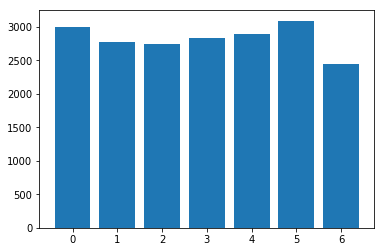

            날짜       업종코드       나이코드        이용건수         이용금액  week
132 2018-08-11  54.899462  41.656347  115.427408  2600.056868     5
133 2018-08-12  53.970824  41.311925  108.334443  2032.123556     6
134 2018-08-13  55.683108  41.813345  116.707770  2305.793750     0
135 2018-08-14  55.283117  41.902037  122.189530  2491.583403     1
136 2018-08-15  54.110228  41.585409  113.936584  2328.989754     2


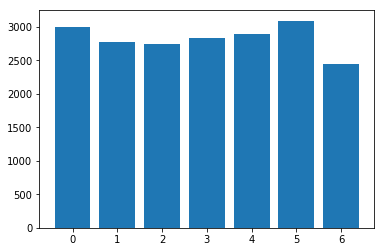

            날짜       업종코드       나이코드        이용건수         이용금액  week
165 2018-09-13  55.733871  42.020329  120.181620  2351.331149     3
166 2018-09-14  55.200457  41.736644  122.126287  2518.843000     4
167 2018-09-15  54.908575  41.554224  114.527900  2677.283417     5
168 2018-09-16  54.106889  41.162486  109.514414  2324.798016     6
169 2018-09-17  55.810753  41.921423  117.360463  2540.963110     0


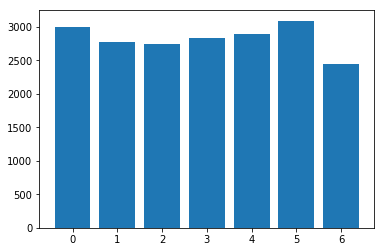

            날짜       업종코드       나이코드        이용건수         이용금액  week
199 2018-10-17  56.119835  41.864198  116.198683  2323.457942     2
200 2018-10-18  55.692193  41.858392  115.236838  2306.839908     3
201 2018-10-19  55.557245  41.917853  120.747574  2494.068887     4
202 2018-10-20  54.941093  41.560635  116.912504  2790.201382     5
203 2018-10-21  54.151092  41.331008  111.613365  2308.154030     6


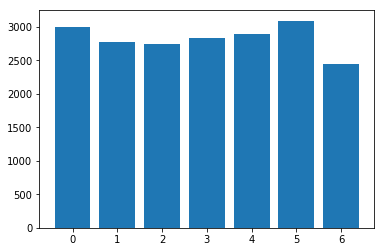

            날짜       업종코드       나이코드        이용건수         이용금액  week
232 2018-11-19  56.238751  41.851075  109.508899  2229.512089     0
233 2018-11-20  55.617755  41.881910  111.508543  2344.426466     1
234 2018-11-21  56.103257  41.805742  111.813969  2571.858630     2
235 2018-11-22  55.860728  41.966992  111.453183  2321.109464     3
236 2018-11-23  55.334756  41.692661  114.861927  2529.044984     4


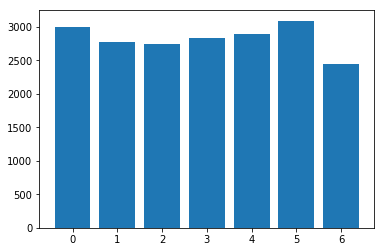

            날짜       업종코드       나이코드        이용건수         이용금액  week
265 2018-12-22  54.813672  41.652623  116.994595  2924.920350     5
266 2018-12-23  53.710468  41.425390  107.562546  2437.530995     6
267 2018-12-24  55.303537  41.581190  128.711897  2989.358360     0
268 2018-12-25  53.895412  41.578757  121.040824  2775.179913     1
269 2018-12-26  55.825900  41.734390  110.159399  2535.862570     2


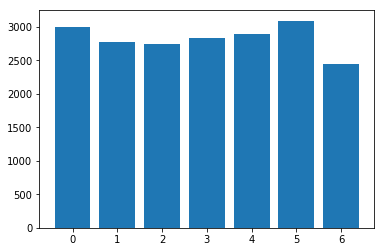

            날짜       업종코드       나이코드        이용건수         이용금액  week
298 2019-01-24  55.933458  42.112268  111.811977  2458.860433     3
299 2019-01-25  55.603240  42.124467  117.118500  2650.145951     4
300 2019-01-26  54.865618  41.980062  111.473497  2791.164370     5
301 2019-01-27  54.009438  41.465716  105.825693  2182.742874     6
302 2019-01-28  56.023570  42.216909  109.622032  2493.128096     0


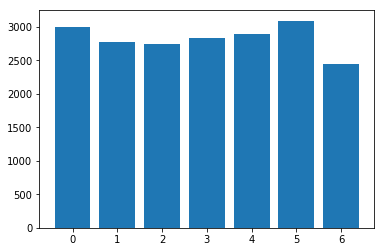

            날짜       업종코드       나이코드        이용건수         이용금액  week
331 2019-02-26  55.368509  42.103853  115.493635  2636.652764     1
332 2019-02-27  55.489712  42.106173  114.734650  2573.463704     2
333 2019-02-28  55.096643  42.218258  117.329820  2839.164748     3
334 2019-03-01  54.280840  41.840336  113.593445  2633.718319     4
335 2019-03-02  54.790883  41.852088  111.660822  2682.742588     5


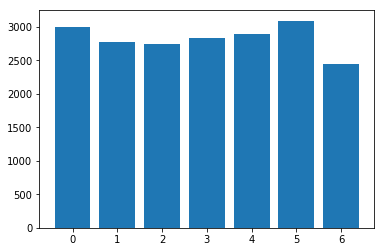

In [10]:


data_mi_day = (df_mi.groupby(by = '날짜', as_index = False).mean())[['pm10', '날짜']]
df_card_day = (df_card.groupby(by = '날짜', as_index = False).mean())
for df in [df_card_day, data_mi_day]:
    df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

    
df_card_day['week'] = df_card_day['날짜'].dt.weekday
data_mi_day['week'] = df_card_day['날짜'].dt.weekday
    
a = np.linspace(0, 365, 12)
for i in range(len(a)-1):
    #subplot(3, 4, )
    df_test = df_card_day.iloc[int(a[i]):int(a[i+1])]
    print(df_test.head())
    plt.bar(x=df_card_day['week'], height = df_card_day['이용금액'])
    plt.show()
    
#plt.bar(x=df_card_day['week'], height = df_card_day['이용금액'])

#plt.show()

# 성별 소비량 비교

In [15]:
df_card_sex = df_card

#print(df_card_sex_m.head())
df_card_sex_m = df_card_sex[df_card_sex['성별코드']=='M'].groupby(by = '날짜', as_index = False).mean()
df_card_sex_w = df_card_sex[df_card_sex['성별코드']=='F'].groupby(by = '날짜', as_index = False).mean()

for df in [df_card_sex_m, df_card_sex_w]:
    df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

df_card_sex_m['week'] = df_card_sex_m['날짜'].dt.weekday
df_card_sex_w['week'] = df_card_sex_w['날짜'].dt.weekday

df_card_sex_m.head()

,날짜,업종코드,나이코드,이용건수,이용금액,week
0,2018-04-01,53.152592,41.304821,112.241392,2363.622689,6
1,2018-04-02,55.720328,42.029508,113.138361,2307.844590,0
2,2018-04-03,55.899426,41.604792,115.966588,2346.080324,1
3,2018-04-04,55.910792,42.008019,115.442366,2411.007016,2
4,2018-04-05,55.774648,41.875000,110.511268,2289.538732,3


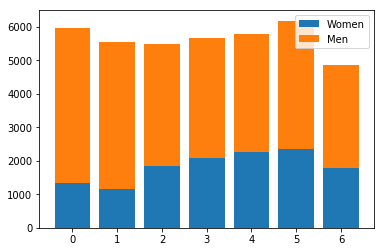

In [34]:
p1 = plt.bar(df_card_sex_w['week'], height = df_card_sex_w['이용금액'])
p2 = plt.bar(df_card_sex_m['week'], height = df_card_sex_m['이용금액'], bottom = df_card_sex_w['이용금액'])
plt.legend((p1[0], p2[0]), ('Women', 'Men'), loc = 'upper right')

# 연령대별 소비 비교

C:\Users\Sunghyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sunghyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


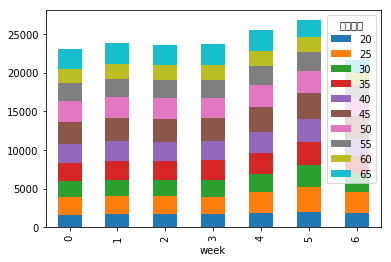

In [69]:
# df.pivot_table(values='val', index=df.index, columns='key', aggfunc='first')

df_card_a = df_card[['날짜', '나이코드', '이용금액']]

for df in [df_card_a]:
    df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y-%m-%d')

df_card_a['week'] = df_card_a['날짜'].dt.weekday
df_card_age = df_card_a.pivot_table(values = '이용금액', index = 'week', columns = '나이코드' )
df_card_age.plot(kind = 'bar', stacked = True)
